In [1]:
import pandas as pd
import numpy as np
import datetime as datetime
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import *
%matplotlib inline

In [2]:
no_showup=pd.read_csv('C:/Users/sandhya/Downloads/noshowappointments/KaggleV2-May-2016.csv')
no_showup.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
no_showup.rename(columns = {'Hipertension':'HyperTension' , 'Handcap':'HandiCap'},inplace=True)
no_showup.columns

Index([u'PatientId', u'AppointmentID', u'Gender', u'ScheduledDay',
       u'AppointmentDay', u'Age', u'Neighbourhood', u'Scholarship',
       u'HyperTension', u'Diabetes', u'Alcoholism', u'HandiCap',
       u'SMS_received', u'No-show'],
      dtype='object')

In [4]:
no_showup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
HyperTension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
HandiCap          110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
#droping the column if all the values are null
no_show=no_showup.dropna(axis='columns',how='all')
no_show.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,HyperTension,Diabetes,Alcoholism,HandiCap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [28]:
no_show.describe()

,PatientId,AppointmentID,Age,Scholarship,HyperTension,Diabetes,Alcoholism,HandiCap,SMS_received,WaitTime,num_gender,numNoshow,age_category,month
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,9 days 17:08:34.161960,0.350023,0.201933,0.160142,5.210048
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,15 days 05:51:27.891504,0.476979,0.401444,0.880381,0.473780
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7 days +10:10:40,0.000000,0.000000,0.000000,4.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1 days +15:41:31.500000,0.000000,0.000000,0.000000,5.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3 days 11:22:18,0.000000,0.000000,0.000000,5.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,14 days 07:41:34.500000,1.000000,0.000000,0.000000,5.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,178 days 13:19:01,1.000000,1.000000,5.000000,6.000000


In [7]:
#selecting the valid age
#no_show = no_show[(no_show.Age > 0) & (no_show.Age <= 100)]

In [29]:
#Converting the date columns to  datetime64 format
no_show['ScheduledDay'] = no_show.ScheduledDay.apply(np.datetime64)
no_show['AppointmentDay'] = no_show.AppointmentDay.apply(np.datetime64)
no_show['WaitTime']=no_show.AppointmentDay-no_show.ScheduledDay
no_show.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,HyperTension,Diabetes,Alcoholism,HandiCap,SMS_received,No-show,WaitTime,num_gender,numNoshow,age_category,month
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,-1 days +05:21:52,0,0,0,4
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,-1 days +07:51:33,1,0,0,4
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,-1 days +07:40:56,0,0,0,4
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,-1 days +06:30:29,0,0,0,4
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,-1 days +07:52:37,0,0,0,4


In [9]:
# since there is only a single record with invalid age,updating the age with value -1 to mean of age
#age_mean=NoShow.Age.mean()
#no_show.Age[(no_show.Age <= 0) & (no_show.Age >= 100)] = age_mean

In [10]:
# checking if there are any missing values

no_show.fillna('')
no_show.isnull().values.any()


False

In [11]:
for i in no_show.columns:
    unique_count=no_show[i].nunique()
    if unique_count < 20:
       print(no_show[i].value_counts())
       print('---------')
       print('\n')

F    71840
M    38687
Name: Gender, dtype: int64
---------


0    99666
1    10861
Name: Scholarship, dtype: int64
---------


0    88726
1    21801
Name: HyperTension, dtype: int64
---------


0    102584
1      7943
Name: Diabetes, dtype: int64
---------


0    107167
1      3360
Name: Alcoholism, dtype: int64
---------


0    108286
1      2042
2       183
3        13
4         3
Name: HandiCap, dtype: int64
---------


0    75045
1    35482
Name: SMS_received, dtype: int64
---------


No     88208
Yes    22319
Name: No-show, dtype: int64
---------




In [12]:
#converting gender and no-show columns to numeric values
le = preprocessing.LabelEncoder()
le.fit(['F', 'M'])
no_show['num_gender']=le.transform(no_show['Gender'])
le.fit(['No', 'Yes'])
no_show['numNoshow']=le.transform(no_show['No-show'])

In [13]:
# there are 3540 invalid records
no_show[no_show.Age<=0].count()

PatientId         3540
AppointmentID     3540
Gender            3540
ScheduledDay      3540
AppointmentDay    3540
Age               3540
Neighbourhood     3540
Scholarship       3540
HyperTension      3540
Diabetes          3540
Alcoholism        3540
HandiCap          3540
SMS_received      3540
No-show           3540
WaitTime          3540
num_gender        3540
numNoshow         3540
dtype: int64

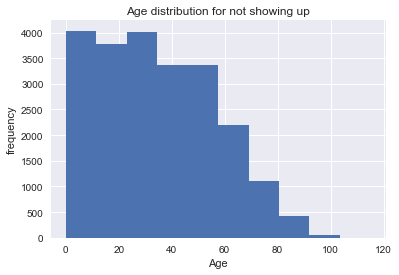

In [24]:
#Visualization of age for no show
no_show['Age'][no_show['No-show']=='Yes'].hist()
sns.plt.title('Age distribution for not showing up')
sns.plt.xlabel('Age')
sns.plt.ylabel('frequency')
sns.plt.show()

based on  age distribution for no show, age is not a indicator of no show

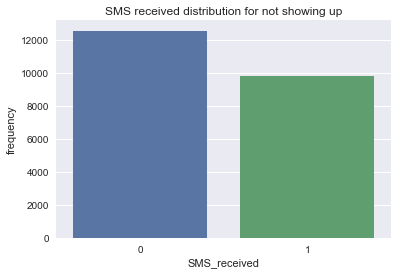

In [27]:
#Visualization of SMS received for no show
SMS_cnt=no_show[no_show['No-show'] == 'Yes'].groupby('SMS_received').count().reset_index()
sns.barplot(data = SMS_cnt ,x = 'SMS_received', y = 'No-show')
sns.plt.title('SMS received distribution for not showing up')
sns.plt.xlabel('SMS_received')
sns.plt.ylabel('frequency')
sns.plt.show()

It shows that patients who recieve the SMS are not showing up for the appointments.

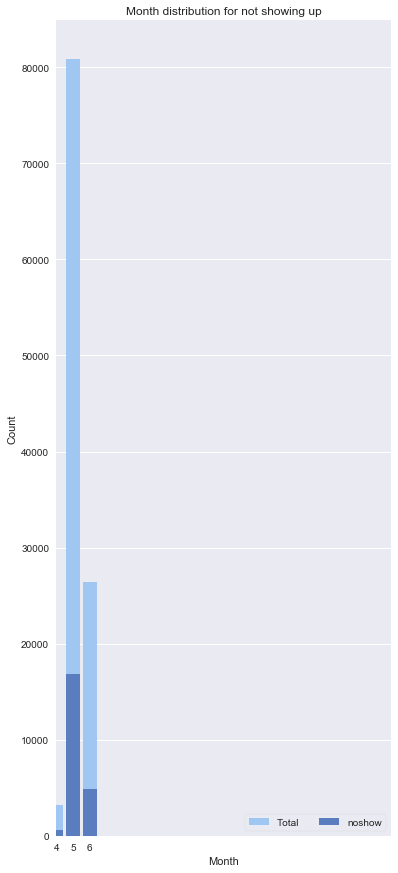

In [25]:
no_show['month'] = no_show['AppointmentDay'].dt.month
no_show_total=no_show.groupby('month').count().reset_index()
month_pattern_noshow=no_show[no_show['numNoshow']== 1]
noshow_count=month_pattern_noshow.groupby('month').count().reset_index()
month_pattern_show=no_show[no_show['numNoshow']== 0]
show_count=month_pattern_show.groupby('month').count().reset_index()


 # Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))


#noshow = sns.load_dataset("noshow")


sns.set_color_codes("pastel")
sns.barplot(x="month", y='No-show', data=no_show_total ,label="Total",color='b')


sns.set_color_codes("muted")
sns.barplot(x='month', y='No-show', data=noshow_count ,label='noshow',color='b')
sns.plt.title('Month distribution for not showing up')
sns.plt.xlabel('Month')
sns.plt.ylabel('Count')
# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 20), ylabel="Count", xlabel="Month")
sns.despine(left=True, bottom=True)

Above plot shows that month may has maximum number of no shows.

In [17]:
noshowweek=no_show[no_show['numNoshow']==1]
dayofweek=pd.DataFrame({'AppointmentDay':noshowweek['AppointmentDay'].dt.weekday_name,'Noshow': noshowweek['numNoshow']})
weekday_count=dayofweek.groupby('AppointmentDay').Noshow.count().reset_index()

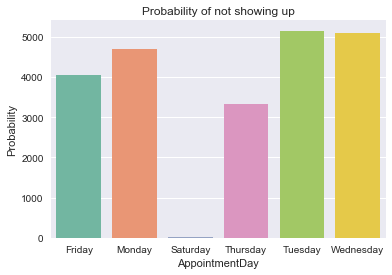

In [18]:
noshowweek=no_show[no_show['numNoshow']==1]
dayofweek=pd.DataFrame({'AppointmentDay':noshowweek['AppointmentDay'].dt.weekday_name,'Noshow': noshowweek['numNoshow']})
weekday_count=dayofweek.groupby('AppointmentDay').Noshow.count().reset_index()
sns.barplot(data =weekday_count ,x = 'AppointmentDay', y = 'Noshow',  palette = 'Set2')
sns.plt.title('Probability of not showing up')
sns.plt.ylabel('Probability')
sns.plt.show()

from the above Visualization no show is more during the start of the week when compared to end of the week

In [19]:
conditions_to_melt=['Diabetes', 'Alcoholism', 'HyperTension', 'Scholarship']
melted=pd.melt(no_show, id_vars='numNoshow', value_vars=conditions_to_melt, value_name='level',var_name='Condition')
melted.sample(5)

,numNoshow,Condition,level
323998,0,HyperTension,0
368370,0,Scholarship,0
210297,0,Alcoholism,0
298185,0,HyperTension,1
435179,1,Scholarship,0


In [20]:
melted.pivot_table(index=['Condition','level'],values='numNoshow',aggfunc='mean').reset_index()

,Condition,level,numNoshow
0,Alcoholism,0,0.201946
1,Alcoholism,1,0.201488
2,Diabetes,0,0.203628
3,Diabetes,1,0.180033
4,HyperTension,0,0.209037
5,HyperTension,1,0.173020
6,Scholarship,0,0.198072
7,Scholarship,1,0.237363


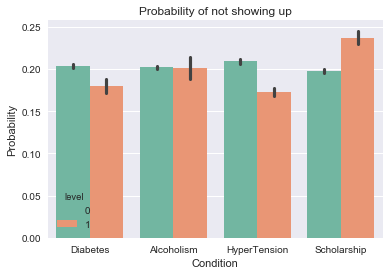

In [21]:
sns.barplot(data = melted , x = 'Condition', y = 'numNoshow', hue = 'level', palette = 'Set2')
sns.plt.title('Probability of not showing up')
sns.plt.ylabel('Probability')
sns.plt.show()

Above vistualization of various health conditions and scholarship doesnot show any relationship with not showing up for appointments. So these are not a good indicators of no show

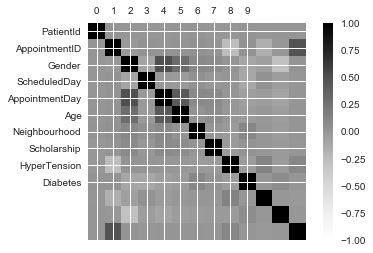

In [22]:
correlation = no_show.corr()
correlation

# plot the correlation
fig = plt.figure()
ax = fig.add_subplot(111)
cax= ax.matshow(correlation, vmin =-1, vmax = 1)
fig.colorbar(cax)
ticks = np.arange(0,10,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_yticklabels(no_show.columns)
plt.show()

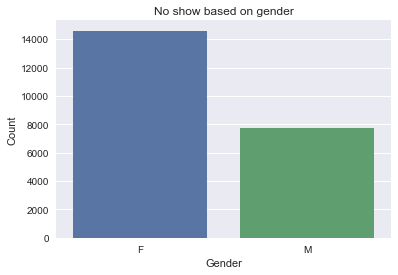

In [23]:
gender_cnt=no_show[no_show['No-show'] == 'Yes'].groupby('Gender').count().reset_index()
sns.barplot(data = gender_cnt ,x = 'Gender', y = 'No-show')
sns.plt.title('No show based on gender')
sns.plt.ylabel('Count')
sns.plt.show()

above plot shows female patients tend to miss the appointment when compared to male.

In [31]:
no_show.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 19 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
HyperTension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
HandiCap          110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
WaitTime          110527 non-null timedelta64[ns]
num_gender        110527 non-null int64
numNoshow         110527 non-null int64
age_category      110527 non-null int64
month             110527 non-null int64
dtypes: datetime64[ns](2), float64(1), int64(12), object(3), timedelta64[ns](1)
memory usage: 16

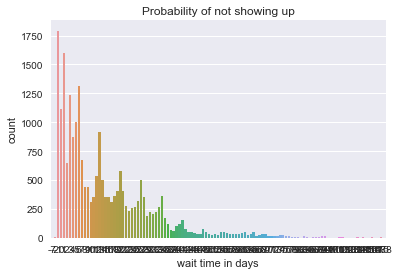

In [39]:
noshow_waittime=no_show[no_show['numNoshow']==1]
#days=[0,20,40,60,80,100,120,140,160,180]
df_waittime=pd.DataFrame({'WaitTime':noshow_waittime['WaitTime'].dt.days,'Noshow': noshow_waittime['numNoshow']})
waittime_count=df_waittime.groupby('WaitTime').Noshow.count().reset_index()
sns.barplot(data =waittime_count ,x ='WaitTime', y = 'Noshow')
sns.plt.title('Probability of not showing up')
sns.plt.xlabel('wait time in days')
sns.plt.ylabel('count')
sns.plt.show()